In [29]:
import sys
import numpy as np
sys.path.append("../..")

%load_ext autoreload
%autoreload 2


import pytwoway as pytw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
##### Test qi matrix #####
# Set parameter values
nl = 3
nk = 4
mmult = 100

# Initiate BLMEstimator object
blm = pytw.BLMEstimator({'nl': nl, 'nk': nk})
model = blm._m2_mixt_new(fixb=False, stationary=False)

jdata = blm._m2_mixt_simulate_movers(model, model.NNm * mmult)

blm.A1 = model.A1
blm.A2 = model.A2
blm.S1 = model.S1
blm.S2 = model.S2
blm.pk1 = model.pk1
blm.pk0 = model.pk0
blm.NNm = model.NNm
blm.NNs = model.NNs

jdata
blm.fit_A(jdata, {"maxiter":10})

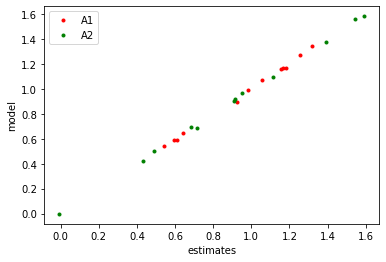

In [118]:
import matplotlib.pyplot as plt

plt.plot(blm.A1.flatten(), model.A1.flatten(), ".",color="red",label="A1")
plt.plot(blm.A2.flatten(), model.A2.flatten(), ".",color="green",label="A2")
plt.ylabel("model")
plt.xlabel("estimates")
plt.legend()
plt.show()